In [1]:
from queue import Queue
import numpy as np
from fxpmath import Fxp
from numpy import random
from numpy import *

In [2]:
def diff_letters(a,b):
    return sum ( a[i] != b[i] for i in range(len(a)) )

In [22]:
def sortFullMatrixbinary(list_in): #Eg: 32x200 bits filter sorting
    list_len = len(list_in)
    print(list_len)
    switchingact = np.zeros(list_len)
    original_index=[]
    original_index = np.asanyarray([i for i in range(list_len)])
    sw_mat = []
    for row in range(list_len - 1): # Iterate until total rows - 2 or 3
#         print('starting with row :', row)
        sw_vector = np.zeros(list_len)
        switchingBefore = 200
        sw_row = []
        for ii in range(row+1, list_len): # Iterate until total rows - 2 or 3
            sw_vector[ii] =  diff_letters(list_in[row], list_in[ii])  
            sw_row.append(sw_vector[ii])
#         print('Switching vector', sw_vector)
#         new_order = np.argsort(sw_vector)
        new_row = np.argmin(sw_vector[row + 1:]) + row + 1  # Adding 1 to cancel the offset from removing (row + 1)th index
        sw_mat.append(sw_row)
#         print('matrix before sorting')
#         print(mat1)
        # switch row i+1 and row i+2
        
#         list_in[[row+1, new_row]] = list_in[[new_row, row+1]]
        list_in[row+1], list_in[new_row] = list_in[new_row], list_in[row+1]
        original_index[[row+1, new_row]] = original_index[[new_row, row+1]]
#         print('original_index after being sorted:', original_index)
#         print('matrix after sorting')
#         print(mat1)
    return list_in, original_index, sw_vector, sw_mat # Returning original_index to rearrange activation maps++++

In [30]:
def sortFullMatrixbinary2(list_in): #Eg: 32x200 bits filter sorting
    list_len = len(list_in)
#     print(list_len)
    switchingact_original = []
    switchingact_sorted = []
    original_index = []
    original_index = np.asanyarray([i for i in range(list_len)])
    
    for iteration in range(1, list_len): # Iterate 32 times
        sw_vector = np.zeros(list_len)
        for ii in range(list_len-2): # Iterate until total rows - 2 or 3
            temp0 =  diff_letters(list_in[ii],list_in[ii+1])  
            temp1 =  diff_letters(list_in[ii],list_in[ii+2])  
            sw_vector[ii] = temp0
            if iteration==1:
                switchingact_original.append(temp0)
            # Check if temp0 is greater than temp1, if so swap ii+1 with ii+2
            if(temp0 > temp1):
                list_in[ii+1], list_in[ii+2] = list_in[ii+2], list_in[ii+1]
                original_index[[ii+1, ii+2]] = original_index[[ii+2, ii+1]]
                sw_vector[ii] = temp1
    return list_in, original_index, sw_vector, switchingact_original # Returning original_index to rearrange activation maps

In [39]:
rows = [128, 64, 32, 16, 8, 4]
cols = [4, 8, 16, 32, 64, 128]
len_mat = np.size(rows)
sw_average = []
no_exp = 5
def Average(lst): 
    return sum(lst) / len(lst) 
 
for i in range(len_mat):
    sw = []
    for exper in range(no_exp):
        list_in = [[random.randint(0, 2) for _ in range(cols[i])] for _ in range(rows[i])]
        list_out, original_index, sw_vector, switchingact_original = sortFullMatrixbinary2(list_in)
        sw.append((np.sum(switchingact_original)-np.sum(sw_vector))*100/np.sum(switchingact_original))
#     print(list_in)
    sw_average.append(Average(sw))

print(sw_average)
# Create a 2D list filled with random 0s and 1s
# list_in = [[random.randint(0, 2) for _ in range(columns)] for _ in range(rows)]
# list_len = len(list_in)
# list_out, original_index, sw_vector, switchingact_original = sortFullMatrixbinary2(list_in)
# print('Percentage of reduction in switching',(np.sum(switchingact_original)-np.sum(sw_vector))*100/np.sum(switchingact_original))

C:\Users\admin\AppData\Local\Temp\ipykernel_15820\560263640.py:2: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  return sum ( a[i] != b[i] for i in range(len(a)) )


[31.59731592397518, 25.618446232710266, 21.37472541271314, 9.240507282658537, 8.71243514866325, 7.5598852078421]


The result above presents why switching reduction percentage and hence the power saving decreases for filters in deeper layers
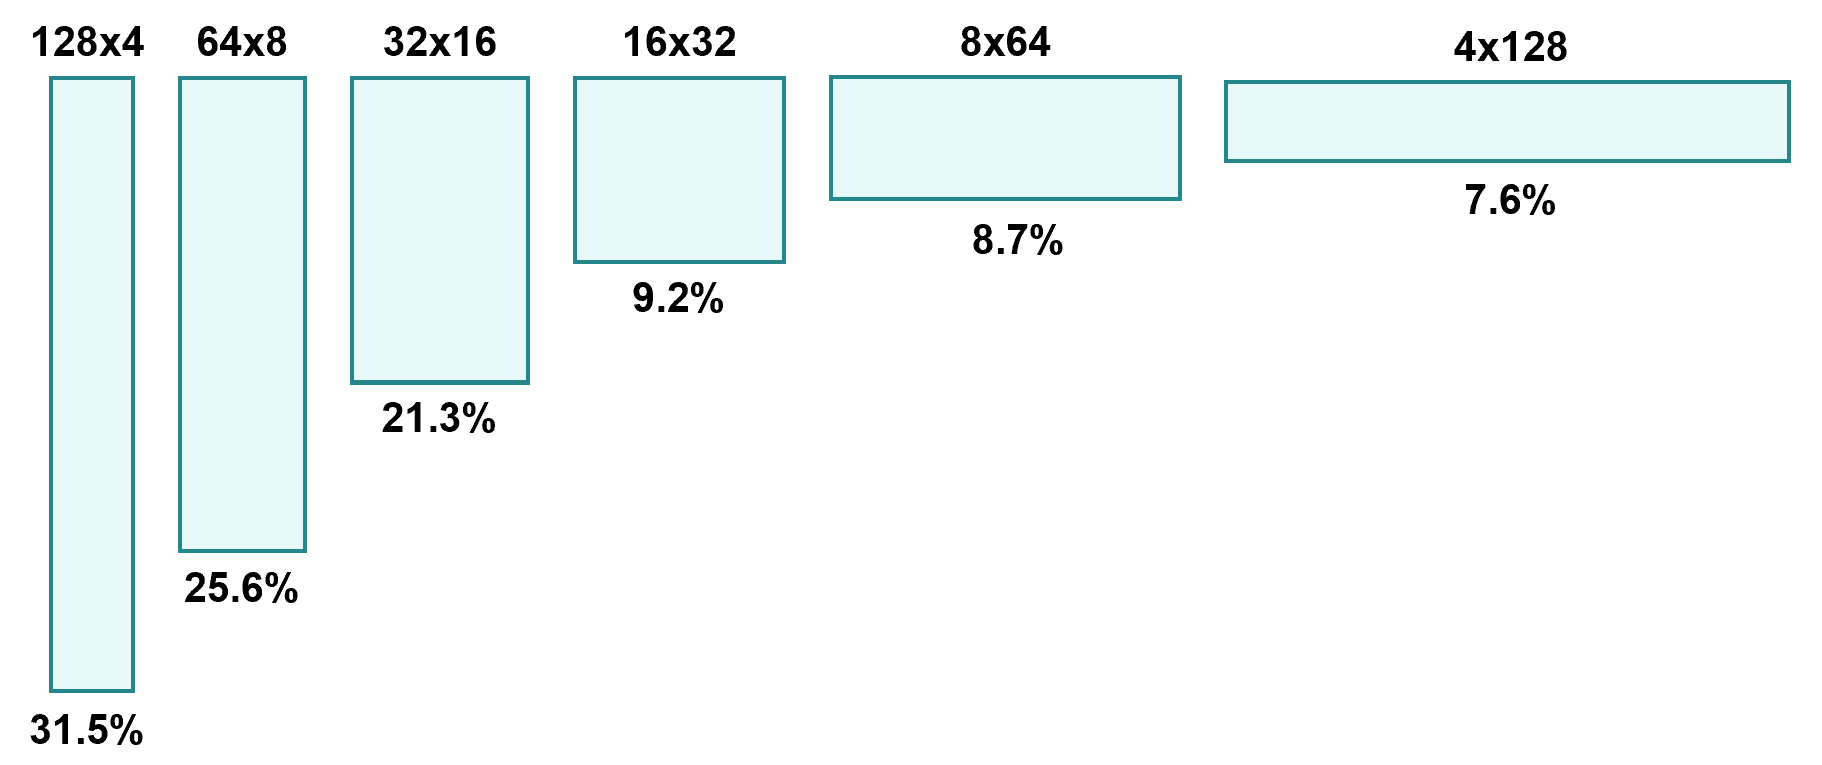

In [6]:
#Sample sorting of simple binary matrix for presentation
list_in = [[1, 0, 1, 1, 1, 1, 0, 1], 
           [1, 1, 1, 1, 1, 0, 0, 1],
           [1, 0, 1, 1, 0, 1, 1, 1],
           [1, 1, 1, 1, 1, 0, 0, 1],
           [1, 0, 0, 1, 1, 1, 1, 1],
           [1, 1, 1, 1, 1, 0, 0, 1],
           [1, 0, 0, 1, 1, 1, 1, 1],
           [1, 1, 1, 1, 1, 1, 0, 1],
           [1, 0, 1, 1, 1, 0, 0, 1]]
rows = 20
columns = 12

# Create a 2D list filled with random 0s and 1s
list_in = [[random.randint(0, 2) for _ in range(columns)] for _ in range(rows)]
print(list_in)
list_len = len(list_in)
print('matrix before sorting')
for lst in list_in:
    print(*lst)
list_out, original_index, sw_vector, switchingact_original = sortFullMatrixbinary2(list_in)
print('matrix after sorting')
for lst in list_out:
    print(*lst)
print('index before sorting', np.asanyarray([i for i in range(list_len)]))
print('index after sorting', original_index)
print('switchingact before sorting', switchingact_original)
print('switchingact after sorting',sw_vector)
print('Total switchingact before sorting', np.sum(switchingact_original))
print('Total switchingact after sorting',np.sum(sw_vector))
print('Percentage of reduction in switching',(np.sum(switchingact_original)-np.sum(sw_vector))*100/np.sum(switchingact_original))


[[0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0], [0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0], [0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1], [1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1], [0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1], [0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0], [0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1], [1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1], [0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0], [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0], [1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0], [1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0], [0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1], [1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0], [1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0], [0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1], [1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0], [0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1], [0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0], [1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1]]
matrix before sorting
0 1 0 1 1 0 1 0 1 1 1 0
0 0 0 1 0 1 0 1 1 1 1 0
0 1 0 1 1 0 0 1 0 1 0 1
1 1 1 0 1 0 1 0 0 0 0 1
0 1 0 0 0 0 0 1 1 1 0 1
0 1 1 1 1 1 0 1 0 0 0 0
0 1 0 0 1 1 1 0 0 0 0 1
1 0 0 1 0 1 1 0 1 1 0 1
0 1 1 0 1 1 1 1 1 0 1 0
0

C:\Users\admin\AppData\Local\Temp\ipykernel_15820\560263640.py:2: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  return sum ( a[i] != b[i] for i in range(len(a)) )
